In [1]:
!pip install tensorflow==2.15.0
!pip install tensorflow-quantum==0.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully unin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 128.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but yo

In [57]:
import importlib, pkg_resources

importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py'>

In [58]:
!pip install scikit-learn

In [59]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm.keras import TqdmCallback


from tensorflow.keras.datasets import fashion_mnist as data

In [60]:

(X_train, Y_train), (X_test, Y_test) = data.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)


X_train_flat = 2 * X_train_flat - 1
X_test_flat = 2 * X_test_flat - 1


Y_train_oh = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test_oh = tf.keras.utils.to_categorical(Y_test, num_classes=10)

In [61]:

n_qubits = 4
pca = PCA(n_components=n_qubits)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)


X_train_pca = (X_train_pca - X_train_pca.min()) / (X_train_pca.max() - X_train_pca.min()) * np.pi
X_test_pca = (X_test_pca - X_test_pca.min()) / (X_test_pca.max() - X_test_pca.min()) * np.pi

In [62]:
# Define quantum circuit
qubits = [cirq.GridQubit(0, i) for i in range(n_qubits)]
inputs = sympy.symbols(f'x0:{n_qubits}')
weights = sympy.symbols(f'w0:{n_qubits}')

circuit = cirq.Circuit()
for i, q in enumerate(qubits):
    circuit.append(cirq.ry(inputs[i])(q))
    circuit.append(cirq.rx(weights[i])(q))
for i in range(n_qubits - 1):
    circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))
readouts = [cirq.Z(q) for q in qubits]

print("Quantum circuit:")
print(circuit)

Quantum circuit:
(0, 0): ───Ry(x0)───Rx(w0)───@───────────
                             │
(0, 1): ───Ry(x1)───Rx(w1)───X───@───────
                                 │
(0, 2): ───Ry(x2)───Rx(w2)───────X───@───
                                     │
(0, 3): ───Ry(x3)───Rx(w3)───────────X───


In [63]:

def convert_to_circuit(data):
    """Encode classical data into quantum circuits."""
    circuits = []
    for x in data:
        circuit = cirq.Circuit()
        for i, q in enumerate(qubits):
            circuit.append(cirq.ry(x[i])(q))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)


X_train_circuits = convert_to_circuit(X_train_pca)
X_test_circuits = convert_to_circuit(X_test_pca)


input_circuits = tf.keras.layers.Input(shape=(), dtype=tf.string)
outputs = tfq.layers.PQC(circuit, readouts)(input_circuits)
output = tf.keras.layers.Dense(10, activation='softmax')(outputs)

model = tf.keras.Model(inputs=input_circuits, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None,)]                 0         
                                                                 
 pqc_14 (PQC)                (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 58 (232.00 Byte)
Trainable params: 58 (232.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [64]:

batch_train = 500
batch_val = 100


history = model.fit(
    x=X_train_circuits[:batch_train],
    y=Y_train_oh[:batch_train],
    validation_data=(
        X_test_circuits[:batch_val],
        Y_test_oh[:batch_val]
    ),
    epochs=5,
    batch_size=32,
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5
16/16 [==============================] - 1s 24ms/step - loss: 2.3624 - accuracy: 0.0380 - val_loss: 2.3620 - val_accuracy: 0.0000e+00
Epoch 2/5
16/16 [==============================] - 0s 14ms/step - loss: 2.3544 - accuracy: 0.0340 - val_loss: 2.3540 - val_accuracy: 0.0100
Epoch 3/5
16/16 [==============================] - 0s 16ms/step - loss: 2.3471 - accuracy: 0.0380 - val_loss: 2.3470 - val_accuracy: 0.0100
Epoch 4/5
16/16 [==============================] - 0s 13ms/step - loss: 2.3406 - accuracy: 0.0480 - val_loss: 2.3403 - val_accuracy: 0.0200
Epoch 5/5
16/16 [==============================] - 0s 16ms/step - loss: 2.3345 - accuracy: 0.0760 - val_loss: 2.3343 - val_accuracy: 0.0600


In [65]:

test_loss, test_accuracy = model.evaluate(
    X_test_circuits,
    Y_test_oh,
    verbose=1
)
print(f"Test accuracy: {test_accuracy:.4f}")


model.save_weights('quantum_fashion_mnist_weights.h5')
print("Model weights saved successfully!")


try:

    model.save('quantum_fashion_mnist_model', save_format='tf')
    print("Full model saved successfully in TF format!")
except Exception as e:
    print(f"Could not save full model in TF format: {e}")
    try:

        model.save('quantum_fashion_mnist_model.h5')
        print("Full model saved successfully in HDF5 format!")
    except Exception as e:
        print(f"Could not save full model in any format: {e}")
        print("Only weights were saved successfully.")

313/313 [==============================] - 2s 7ms/step - loss: 2.3325 - accuracy: 0.0757
Test accuracy: 0.0757
Model weights saved successfully!
Could not save full model in TF format: No encoder for object <keras.src.initializers.initializers.RandomUniform object at 0x7f51b7c1f490> of type <class 'keras.src.initializers.initializers.RandomUniform'>.
Could not save full model in any format: 
Layer PQC was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Only weights were saved successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


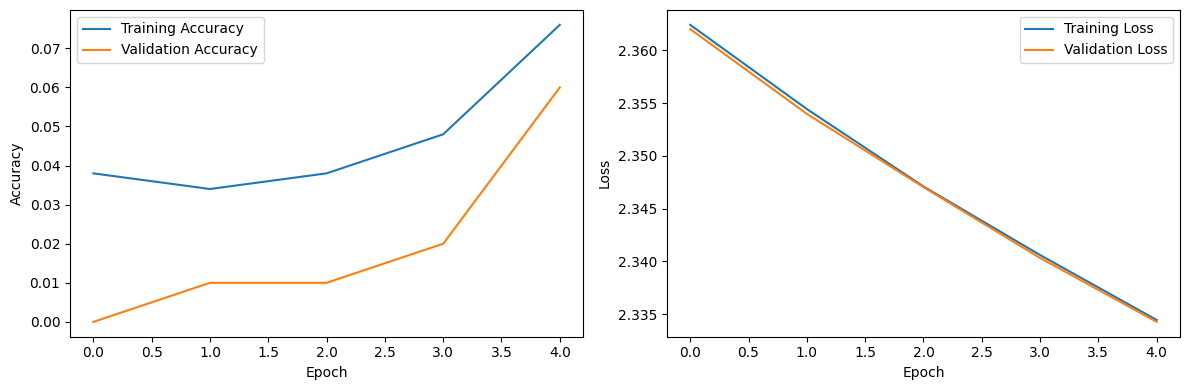

In [66]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()